In [47]:
import pandas as pd
import numpy as np
import opendatasets as od
import matplotlib.pyplot as plt
import seaborn as sns
import re

In [48]:
od.download('https://www.kaggle.com/datasets/thedevastator/australian-housing-data-1000-properties-sampled')

Skipping, found downloaded files in ".\australian-housing-data-1000-properties-sampled" (use force=True to force download)


In [49]:

file_path = r'C:\Users\admin\Desktop\Jupiter Notebook\kaggle\australian-housing-data-1000-properties-sampled\RealEstateAU_1000_Samples.csv'
df = pd.read_csv(file_path)


In [54]:
df['price_cleaned'] = df['price'].apply(lambda x: re.findall(r'\b\d+\b', str(x)))
df['price_cleaned'] = df['price_cleaned'].apply(lambda x: int(x[0]) if x else np.nan)
selected_columns = ['state', 'property_type', 'zip_code', 'bedroom_count', 'bathroom_count', 'parking_count', 'price']
df_final = df[selected_columns + ['price_cleaned']]


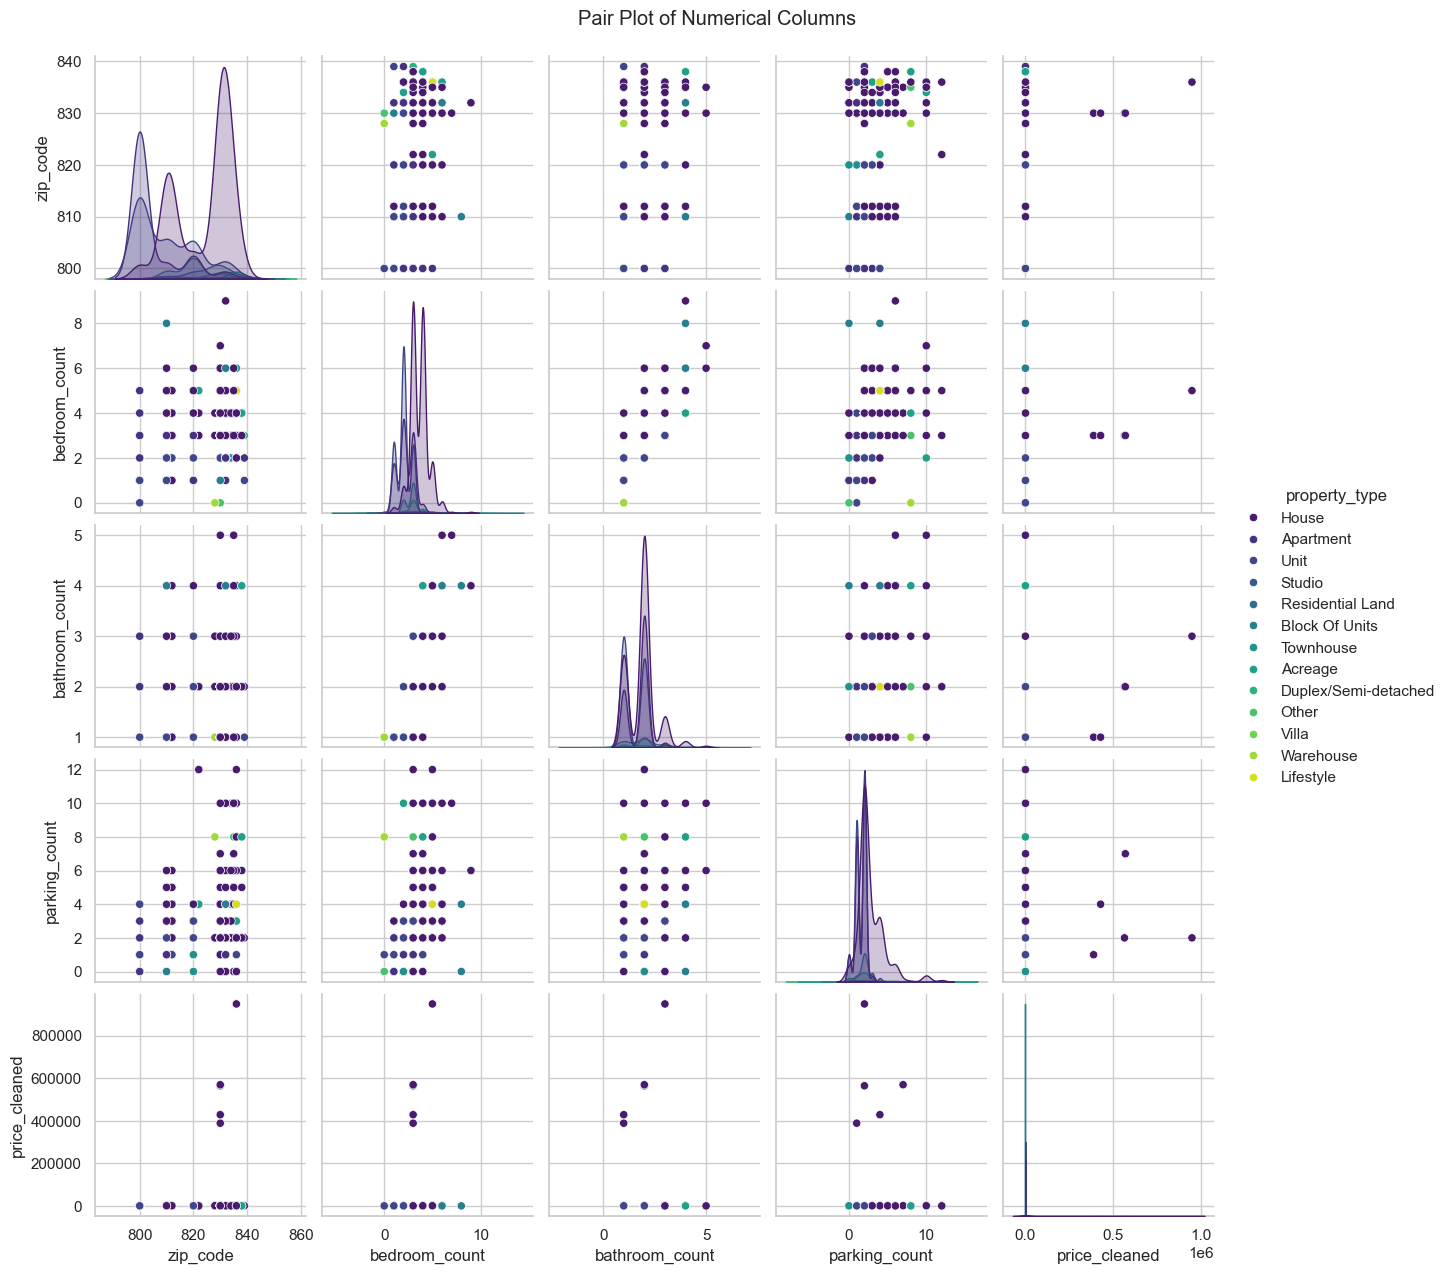

In [51]:
sns.pairplot(df_final, hue='property_type', palette='viridis')
plt.suptitle('Pair Plot of Numerical Columns', y=1.02)
plt.show()

C:\Users\admin\AppData\Local\Temp\ipykernel_1576\3076661938.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='property_type', y='price_cleaned', data=df_final, palette='muted')


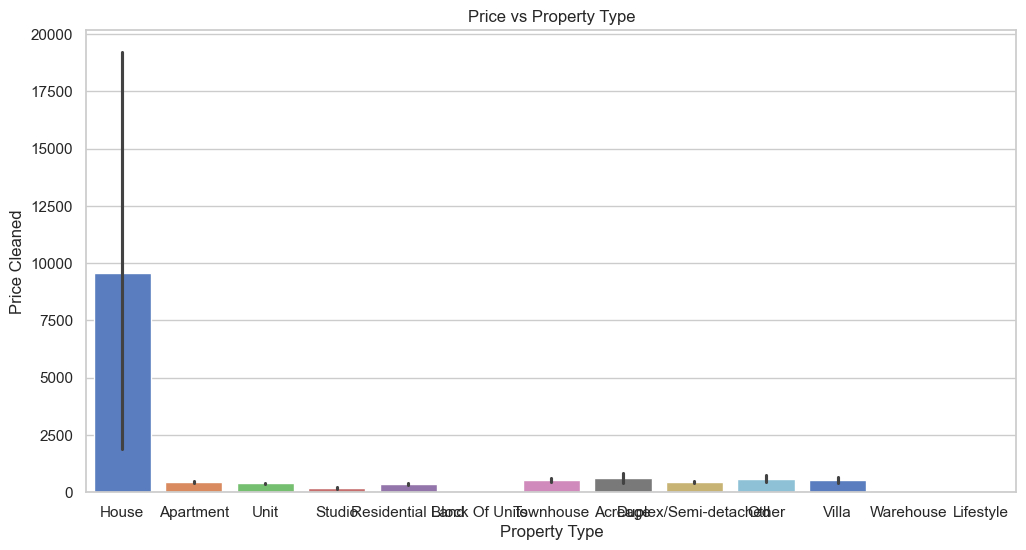

In [52]:
plt.figure(figsize=(12, 6))
sns.barplot(x='property_type', y='price_cleaned', data=df_final, palette='muted')
plt.title('Price vs Property Type')
plt.xlabel('Property Type')
plt.ylabel('Price Cleaned')
plt.show()